## Chapter4 exercise(이수민)

**이 장에 필요한 라이브러리 불러오기**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 4-1. 아침 식사용 시리얼

In [25]:
cereals_df = pd.read_csv('../data/Cereals.csv')

In [26]:
print(cereals_df.shape)
print(cereals_df.columns.tolist())

(77, 16)
['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']


**a. 양적/수치적 변수와 순서형 변수는 어떤 것인가? 명목형 변수는 어떤 것인가?**

In [27]:
#양적/수치적 변수
quant_cols = ['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups','rating']

In [28]:
#순서형 변수
ordinal_cols = ['shelf']

In [29]:
#명목형 변수
nominal_cols = ['name','mfr','type']

In [30]:
print("- 수치형(양적):", quant_cols)
print("- 순서형:", ordinal_cols, "(1=하단, 2=중간, 3=상단)")
print("- 명목형:", nominal_cols)

- 수치형(양적): ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']
- 순서형: ['shelf'] (1=하단, 2=중간, 3=상단)
- 명목형: ['name', 'mfr', 'type']


**b. 각 양적 변수에 대해서 평균,  중앙값, 최솟값, 최댓값, 표준편차를 계산하시오.
[표 4-3]의 예처럼 pandas를 사용한다**

In [31]:
cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [32]:
#교재 방식
print('Mean : ', cereals_df.calories.mean())
print('Std. dev : ', cereals_df.calories.std())
print('Min : ', cereals_df.calories.min())
print('Max : ', cereals_df.calories.max())
print('Median : ', cereals_df.calories.median())
print('Length : ', len(cereals_df.calories))
print('Number of missing values : ', cereals_df.calories.isnull().sum())

Mean :  106.88311688311688
Std. dev :  19.48411905682084
Min :  50
Max :  160
Median :  110.0
Length :  77
Number of missing values :  0


In [33]:
#예제에서는 양적 변수가 여러 개므로 dataframe 형식으로 정리해준다
cereals_summary = pd.DataFrame({
    'mean': cereals_df[quant_cols].mean(),
    'median': cereals_df[quant_cols].median(),
    'min': cereals_df[quant_cols].min(),
    'max': cereals_df[quant_cols].max(),
    'std': cereals_df[quant_cols].std()
}).round(3)

display(cereals_summary)

,mean,median,min,max,std
calories,106.883,110.00,50.000,160.000,19.484
protein,2.545,3.00,1.000,6.000,1.095
fat,1.013,1.00,0.000,5.000,1.006
sodium,159.675,180.00,0.000,320.000,83.832
fiber,2.152,2.00,0.000,14.000,2.383
carbo,14.803,14.50,5.000,23.000,3.907
sugars,7.026,7.00,0.000,15.000,4.379
potass,98.667,90.00,15.000,330.000,70.411
vitamins,28.247,25.00,0.000,100.000,22.343
shelf,2.208,2.00,1.000,3.000,0.833


**c. 각 양적 변수에 대해 히스토그램을 작성하시오. 히스토그램과 요약 통계량을 바탕으로 다음 질문에 답하시오.**

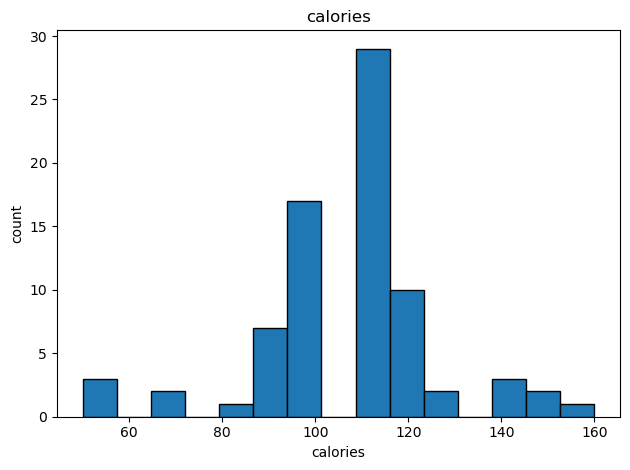

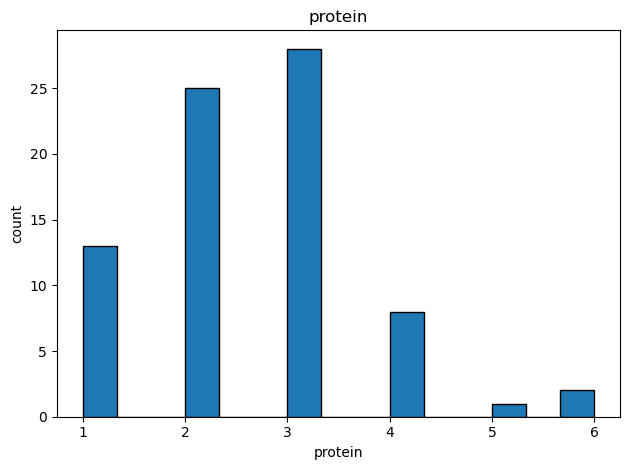

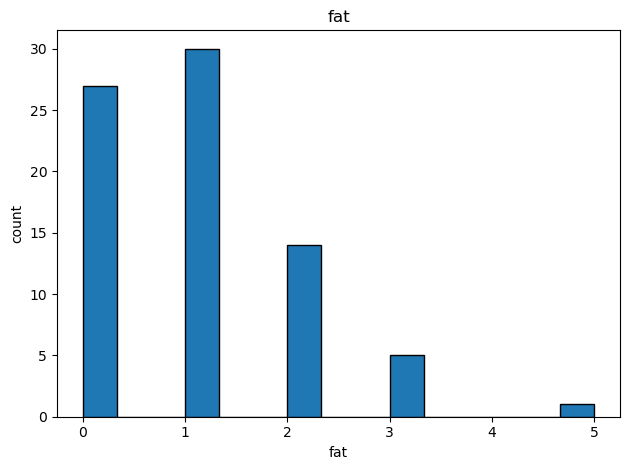

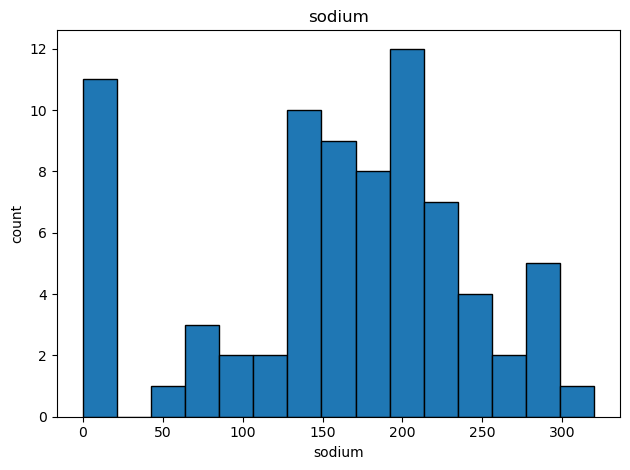

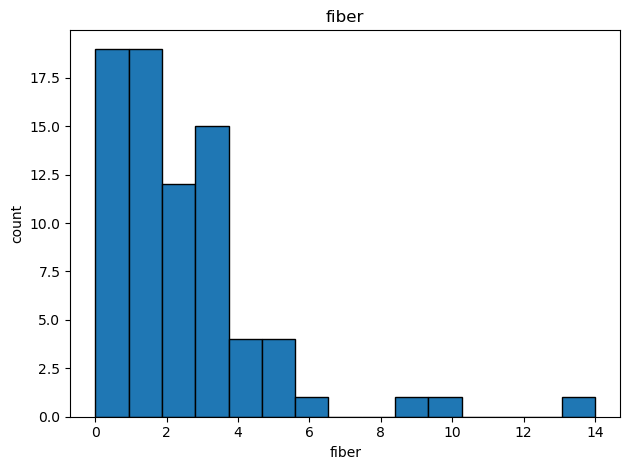

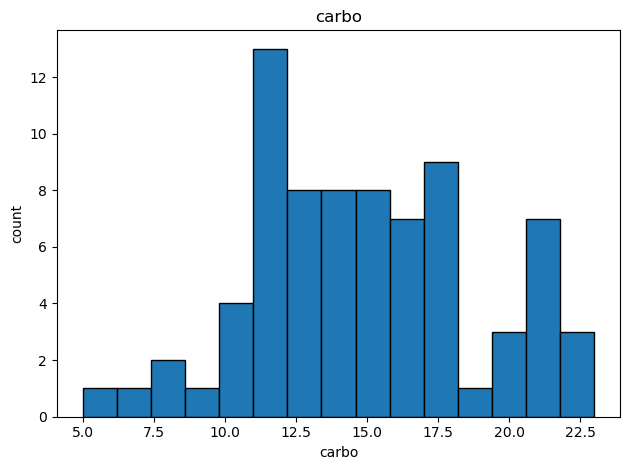

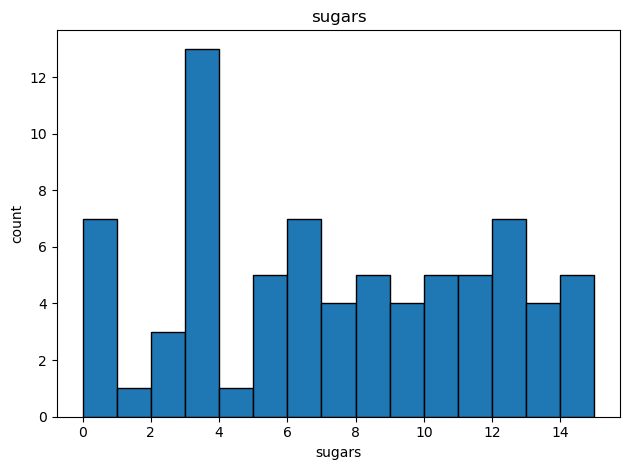

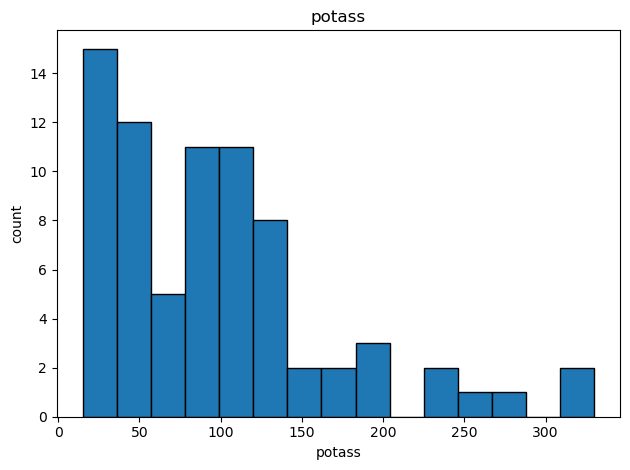

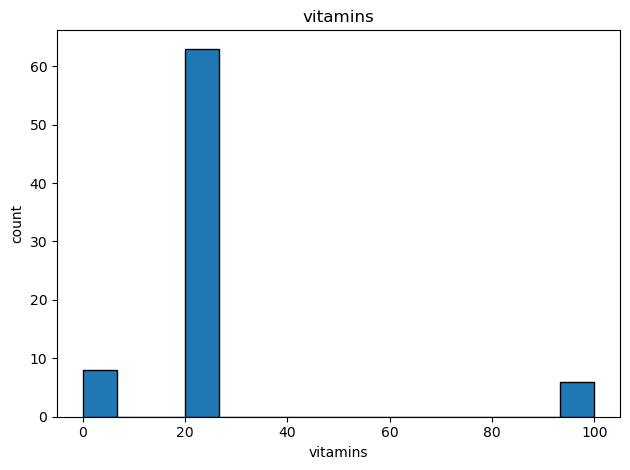

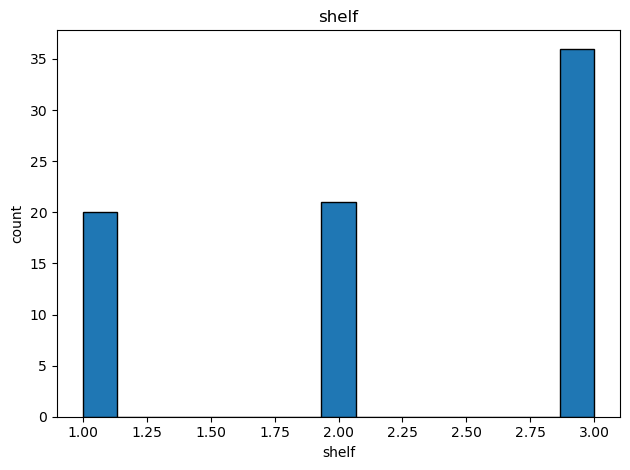

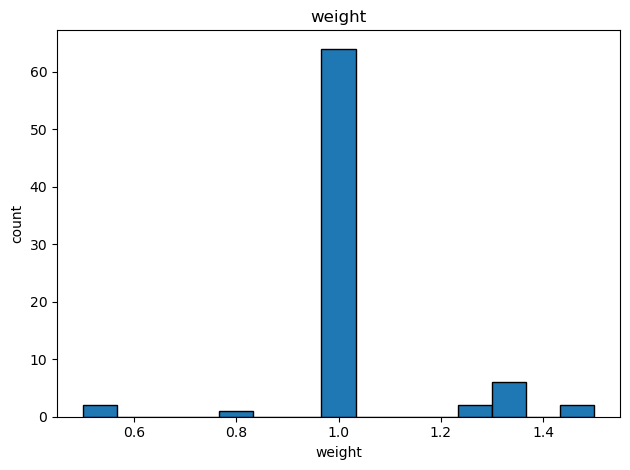

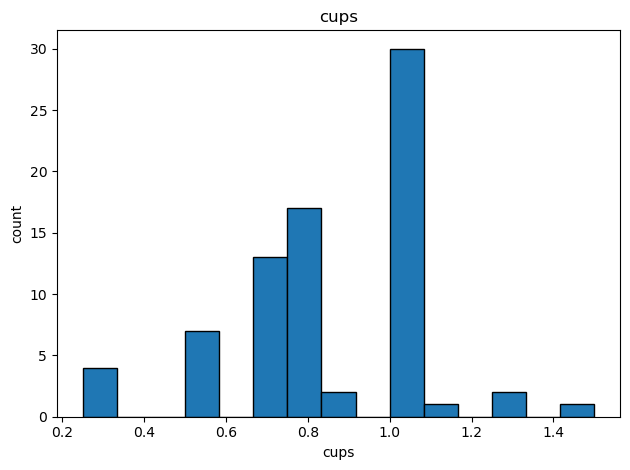

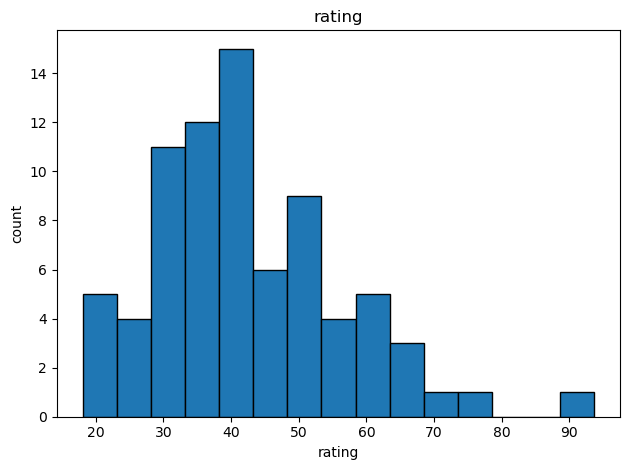

In [34]:
for col in quant_cols:
    cereals_df[col].hist(bins=15, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

**1. 어떤 변수의 변동이 가장 큰가?**

In [35]:
std_sorted = cereals_summary['std'].sort_values(ascending=False)
skew_vals = cereals_df[quant_cols].skew().round(3)

In [36]:
display(std_sorted.to_frame('std'))

,std
sodium,83.832
potass,70.411
vitamins,22.343
calories,19.484
rating,14.047
sugars,4.379
carbo,3.907
fiber,2.383
protein,1.095
fat,1.006


표준편차(Std)가 가장 큰 변수인나트륨(sodium)이다. 표준편차가 크다는 것은 시리얼 간 나트륨 함량의 차이가 크다는 것을 의미하며, 변수의 변동이 크다고 볼 수 있다.

**2. 어떤 변수가 치우쳐 있는가?**

In [37]:
display(skew_vals.to_frame('skew'))

,skew
calories,-0.445
protein,0.746
fat,1.166
sodium,-0.576
fiber,2.432
carbo,0.113
sugars,0.044
potass,1.400
vitamins,2.464
shelf,-0.410


섬유질(fiber), 칼륨(potass), 지방(fat)은 왜도 계수의 절댓값이 1을 초과하였으며, 분포가 오른쪽으로 심하게 치우쳐 있다(양의 치우침). 이는 대부분의 시리얼이 해당 성분들을 낮은 수준으로 함유하고 있으며, 소수의 시리얼만 높은 성분 함량을 가진다는 것을 의미한다.

반면, 설탕(sugars)는 왜도 계수의 절댓값이 0에 가까워 왼쪽으로 약간 치우쳐 있다고 볼 수 있다(음의 치우침). 즉, 설탕 함량이 높은 시리얼이 적음을 알 수 있다.

**3. 극단값으로 보이는 값이 있는가?**

In [38]:
def outlier_count(s: pd.Series):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return int(((s < lower) | (s > upper)).sum())
    
outlier_summary = pd.Series({c: outlier_count(cereals_df[c].dropna()) for c in quant_cols}, name='outlier_count')
display(outlier_summary.sort_values(ascending=False).to_frame())

,outlier_count
calories,14
vitamins,14
weight,13
sodium,9
potass,5
protein,3
fiber,3
rating,1
cups,1
fat,0


IQR (사분위 범위) 기준으로 극단값을 계산하면, 칼로리(calories), 비타민과 미네랄(vitamins), 1회분 무게(weight), 그리고 나트륨(soldium)에서 가장 많은 극단값이 보인다.

**d. 저온용과 고온용 시리얼에 함유된 칼로리를 비교하기 위해 박스 플롯을 나란히 그리시오. 이를 통해 무엇을 알 수 있는가?**

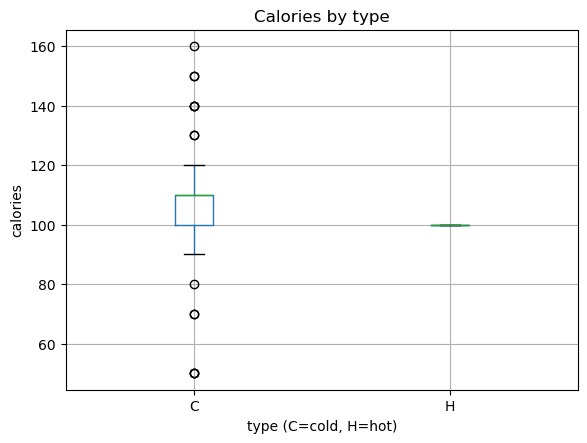

In [39]:
cereals_df.boxplot(column='calories', by='type')
plt.suptitle('')
plt.title('Calories by type')
plt.xlabel('type (C=cold, H=hot)')
plt.ylabel('calories')
plt.show()

저온용 시리얼(C) 칼로리 분포가 고온용 시리얼(H)보다 전반적으로 높고 변동성도 더 크다. 또한, 저온용 시리얼(C)의 중앙값도 고온용 시리얼(C)보다 높다.

**e. 시리얼이 놓인 진열대 높이에 따른 소비자 평점의 박스 플롯을 나란히 그리시오. 진열대 높이를 통해 소비자 평점을 예측할 수 있다면, 세 종류의 진열대 높이를 그대로 유지할 필요가 있겠는가?**

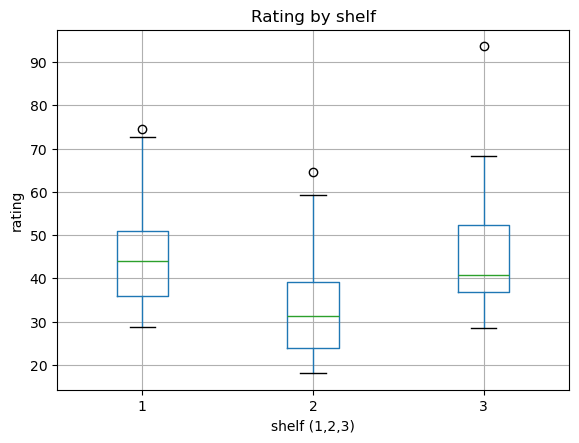

In [40]:
cereals_df.boxplot(column='rating', by='shelf')
plt.suptitle('')
plt.title('Rating by shelf')
plt.xlabel('shelf (1,2,3)')
plt.ylabel('rating')
plt.show()

박스 플롯 결과에 따르면, 진열대 높이를 그대로 유지할 필요가 없다.
진열대 높이가 소비자 평점(소비자 정보를 위한 시리얼의 '건강' 평점)에 유의미한 영향을 미치고 있기 때문이다. 특히 중간 진열대(높이 2)의 평점이 현저히 낮게 나타난다. 이는 진열대 높이가 소비자 평점을 예측하는 데 있어 중요한 변수임을 시사한다.

따라서 시리얼 제조/유통업체는 소비자 평점을 향상시키기 위해서 진열대 높이 1과 3의 시리얼들이 가진 특징을 분석하고, 소비자 평점-진열대 위치 간 관계를 고려하는 등 판매/전략 측면에 변화를 줄 필요가 있다.

**f. 양적 변수에 대한 상관 계수 표를 작성하시오 (corr() 함수 사용) 또한 이들 변수에 대한 산점도 행렬을 작성하시오.**

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000,0.019,0.499,0.301,-0.293,0.258,0.567,-0.072,0.265,0.097,0.696,0.087,-0.689
protein,0.019,1.000,0.208,-0.055,0.500,-0.025,-0.292,0.564,0.007,0.134,0.216,-0.244,0.471
fat,0.499,0.208,1.000,-0.005,0.017,-0.300,0.302,0.200,-0.031,0.264,0.215,-0.176,-0.409
sodium,0.301,-0.055,-0.005,1.000,-0.071,0.298,0.059,-0.043,0.361,-0.070,0.309,0.120,-0.401
fiber,-0.293,0.500,0.017,-0.071,1.000,-0.380,-0.139,0.912,-0.032,0.298,0.247,-0.513,0.584
carbo,0.258,-0.025,-0.300,0.298,-0.380,1.000,-0.471,-0.365,0.219,-0.193,0.138,0.367,0.089
sugars,0.567,-0.292,0.302,0.059,-0.139,-0.471,1.000,0.001,0.098,0.068,0.456,-0.049,-0.764
potass,-0.072,0.564,0.200,-0.043,0.912,-0.365,0.001,1.000,-0.005,0.386,0.420,-0.502,0.416
vitamins,0.265,0.007,-0.031,0.361,-0.032,0.219,0.098,-0.005,1.000,0.299,0.320,0.128,-0.241
shelf,0.097,0.134,0.264,-0.070,0.298,-0.193,0.068,0.386,0.299,1.000,0.191,-0.335,0.025


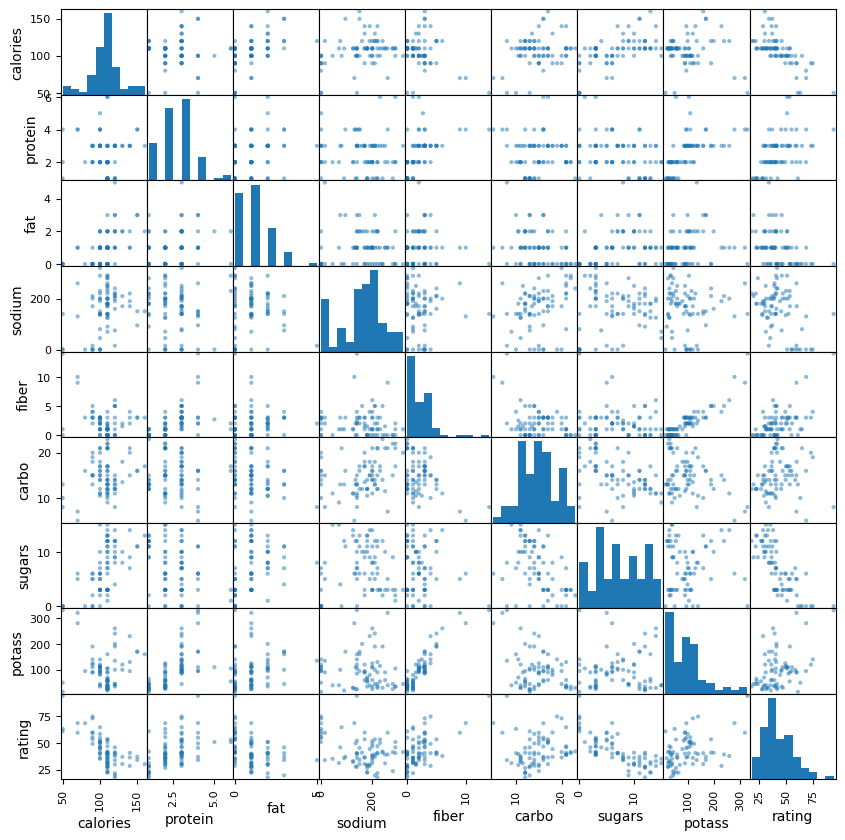

In [41]:
#양적 변수에 대한 상관 계수 표
corr_mat = cereals_df[quant_cols].corr()
display(corr_mat.round(3))

#산점도 행렬
core_cols = ['calories','protein','fat','sodium','fiber','carbo','sugars','potass','rating']
pd.plotting.scatter_matrix(cereals_df[core_cols], figsize=(10,10), diagonal='hist')
plt.show()

**1. 어느 변수 쌍이 가장 높은 상관관계를 나타내는가?**

상관 계수 표를 보면, 가장 높은 양의 상관관계를 나타내는 변수 쌍은 칼륨(potass)과 섬유질(fiber)이다. 이들의 상관계수는 0.90으로, 섬유질 함량이 높은 시리얼은 칼륨 함량도 높다는 것을 의미한다.

반면, 가장 높은 음의 상관관계를 나타내는 변수 쌍은 설탕(sugars)과 평점(rating)이다. 이들의 상관계수는 -0.76으로, 설탕 함량이 높을수록 소비자 평점(소비자 정보를 위한 시리얼의 '건강' 평점)은 낮아진다는 것을 의미한다.

**2. 이들 상관관계를 바탕으로 어떻게 변수의 개수를 축소할 수 있는가?**

매우 강한 상관관계가 있는 변수 쌍 중 하나의 변수(ex. 칼륨/섬유질, 설탕/평점)만 선택하여 사용하거나, 두 변수를 결합한 새로운 변수를 만들어 차원을 축소할 수 있다. 해당 변수 쌍은 정보의 많은 부분이 중복되어 있으므로, 두 변수 중 하나만 사용해도 데이터의 핵심 정보를 충분히 나타낼 수 있다. 이는 정보 손실을 최소화하면서 변수의 개수를 줄일 수 있는 방법이다.

**3. 데이터를 먼저 정규화했다면 상관관계가 어떻게 변하겠는가?**

상관관계 계수 자체는 변하지 않는다. 데이터 정규화는 데이터의 척도를 조정하여 변수 간의 분산 차이에서 오는 영향을 제거하지만, 변수들의 상대적인 선형 관계는 유지된다. 따라서 변수의 선형적 관계의 강도와 방향을 측정하는 상관 계수는 그대로 유지된다. 

**g. [표 4-12]에서 13개의 수치형 변수에 대한 첫 번째 주성분이 무엇을 나타내는지 간략하게 설명하시오.**

첫 번째 주성분(PC1)은 13개 수치형 변수들이 포함하는 총 분산 중 가장 큰 비중을 설명하는 주된 변동 축을 나타낸다.
PC1 성분 계수를 분석한 결과, 음의 상관관계 변수로는 칼로리(calories), 설탕(sugars), 지방(fat)가 있다. 양의 상관관계 변수로는 섬유질(fiiber), 단백질(protein), 칼륨(potass), 평점(rating)이 있다. 
따라서, PC1은 칼로리와 단맛 중심 시리얼과 영양·평점 중심 시리얼의 대비를 하나의 차원으로 요약하고 있다고 볼 수 있다.

## 4-2. 대학 순위

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [43]:
uni_df = pd.read_csv("../data/Universities.csv")
uni_df.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


**a. 모든 범주형 변수들을 제거하시오. 그런 후 데이터에서 연속형 측청치가 결측인 모든 레코드를 제거하시오.**

In [44]:
uni_num = uni_df.iloc[:, 3:]

uni_clean = uni_num.dropna(axis=0) #결측치 제거
uni_clean.shape

(471, 17)

**b. 정제된 데이터에 대해 주성분 분석을 실시하고 그 결과에 대해 설명하시오.**

In [45]:
scaler = StandardScaler()
uni_scaled = scaler.fit_transform(uni_clean)

In [46]:
pca = PCA()
pcs = pca.fit_transform(uni_scaled)

pcsSummary = pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of variance': pca.explained_variance_ratio_,
    'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)
})
pcsSummary.round(3)

,Standard deviation,Proportion of variance,Cumulative proportion
0,2.277,0.304,0.304
1,2.145,0.270,0.574
2,1.100,0.071,0.645
3,1.034,0.063,0.708
4,0.977,0.056,0.764
5,0.874,0.045,0.809
6,0.804,0.038,0.847
7,0.774,0.035,0.882
8,0.704,0.029,0.911
9,0.663,0.026,0.937


**b-1.데이터를 정규화해야 하는가?**

그렇다.
in-state tuition이나 # FT undergrad와 같은 변수들은 값이 수천에서 수만 단위에 이르는 반면, % fac. w/PHD나 Graduation rate는0에서 100 사이의 백분율 값을 가진다. 이러한 변수들의 단위 차이로 인해, 분산이 큰 변수가 총분산을 독차지하여 전체 주성분 결과가 왜곡될 수 있다.
이를 방지하기 위해, PCA를 수행하기 전 데이터 정규화를 진행해 모든 변수의 평균을 0, 표준편차가 1인 표준화된 Z 점수로 변환해야 한다.

**b-2.핵심으로 여겨지는 성분의 특징을 설명하시오.**

PC1(첫 번째 주성분)은 '학교의 전반적인 명성 및 자원 수준'을 나타내는 가장 중요한 축이다. PC1에 높은 양의 계수를 보이는 변수들로는 졸업률, 상위 10% 학생 비율, 수업료 등이 있다. PC1 점수가 높을수록 재정 자원이 풍부하고 학업 성과가 우수한 명문 대학교임을 의미한다.

PC2(두 번째 주성분)는 '규모 및 입학 난이도 대비'를 나타내는 독립적인 축이다. PC2에 높은 양의 계수를 보이는 지원자 수, 합격자 수와 같은 변수들은 학교의 규모를 반영한다.

따라서 해당 예제는 주성분 분석을 통해 대학 순위 데이터를 '명성/자원'과 '규모/접근성' 이 두 핵심 요인으로 요약하였다고 볼 수 있다.